# Random Forest

**Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Importing the Data and Analysis it**

In [2]:
data = pd.read_csv("rock_density_xray.csv")
data

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [3]:
data.columns = ["Signal", "Density"]
data

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


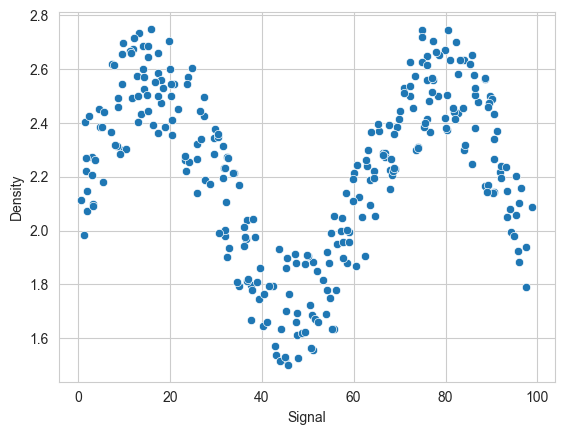

In [4]:
plt.figure(dpi=100)
sns.scatterplot(x="Signal", y="Density", data=data);

**Splitting the data into the Independent and Dependent Features**

In [5]:
x = data["Signal"].values.reshape(-1, 1)
y = data["Density"]

**Splitting the data into the Training and Testing Data**

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=16)

**Defining the function to run model and plot the predictions and getting score** 

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def run_model(model, x_train, y_train, x_test, y_test):

    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print("RMSE -", rmse)
    mae = mean_absolute_error(y_test, predictions)
    print("MAE -", mae)

    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    plt.figure(figsize=(10, 8), dpi=100)
    sns.scatterplot(x="Signal", y="Density", data=data)
    plt.plot(signal_range, signal_preds, c="r", linewidth=1);

**Implementing the Linear Regression Model and Plotting the Prediction**

RMSE - 0.3109486040651364
MAE - 0.24850110772293915


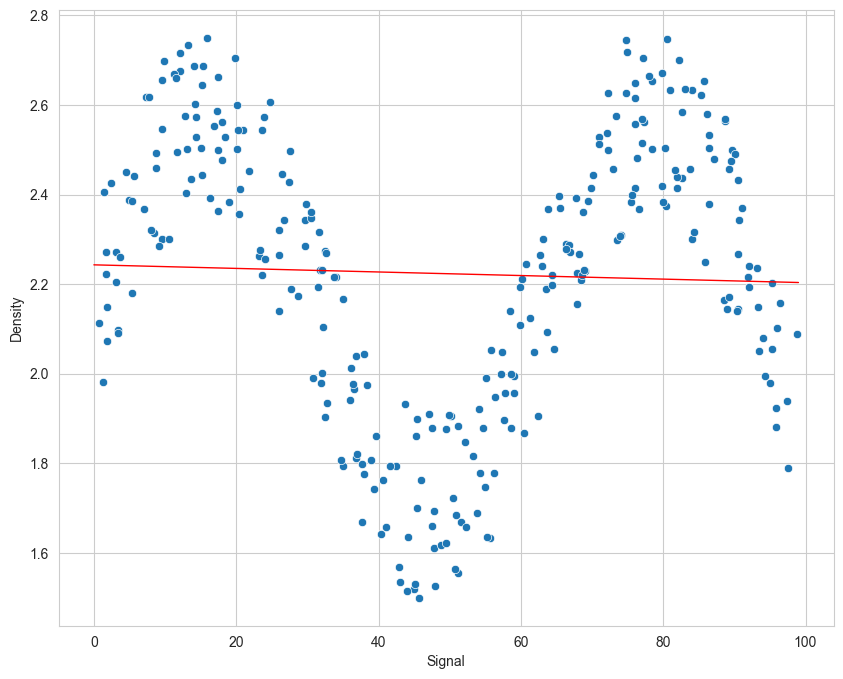

In [8]:
from sklearn.linear_model import LinearRegression
lr_regression = LinearRegression()
lr_regression.fit(x_train, y_train)
lr_pred = lr_regression.predict(x_test)

run_model(lr_regression, x_train, y_train, x_test, y_test)

**Implementing the Polynomial Regression and Plotting the Prediction**

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

RMSE - 0.32116864601150363
MAE - 0.2778154218379669


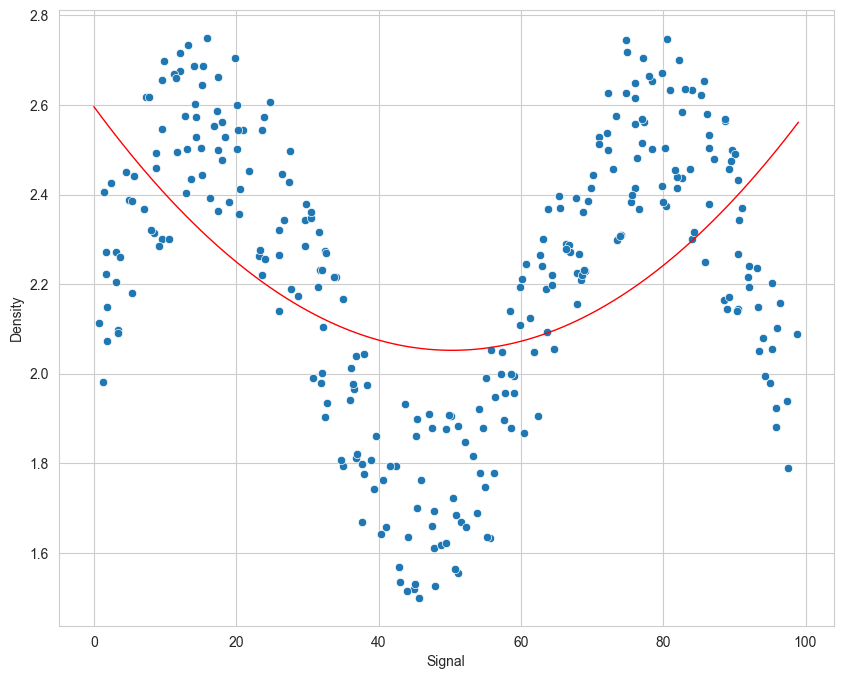

In [10]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

run_model(pipe, x_train, y_train, x_test, y_test)

RMSE - 0.13941583894047854
MAE - 0.12191296030838449


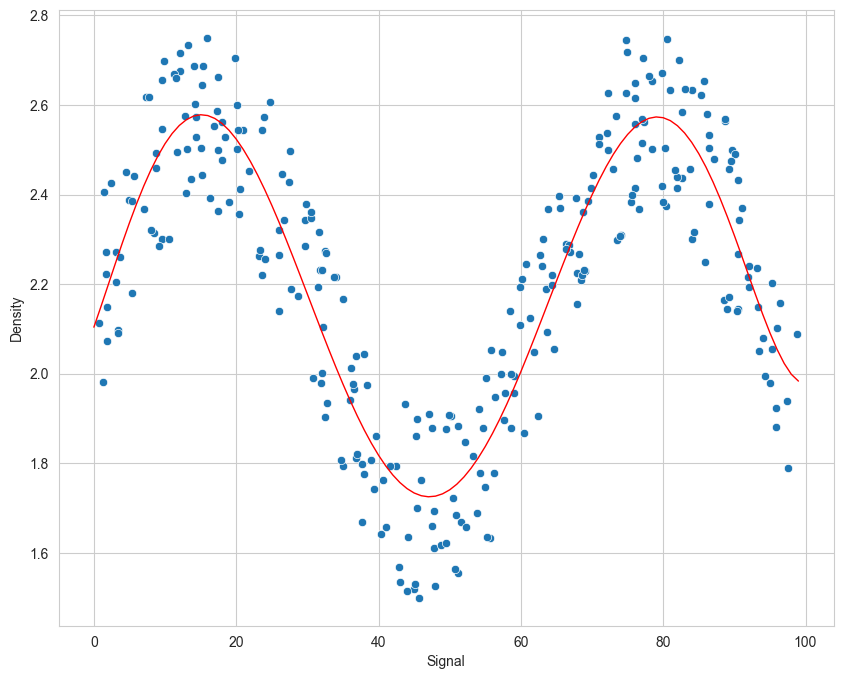

In [11]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

run_model(pipe, x_train, y_train, x_test, y_test)

**Implementing the KNN with Plotting**

RMSE - 0.19344403807225877
MAE - 0.16533041633834927
RMSE - 0.1535513034166155
MAE - 0.1342984715301804
RMSE - 0.14206462446035625
MAE - 0.1242968756522796
RMSE - 0.14862705459790232
MAE - 0.12714261505887828


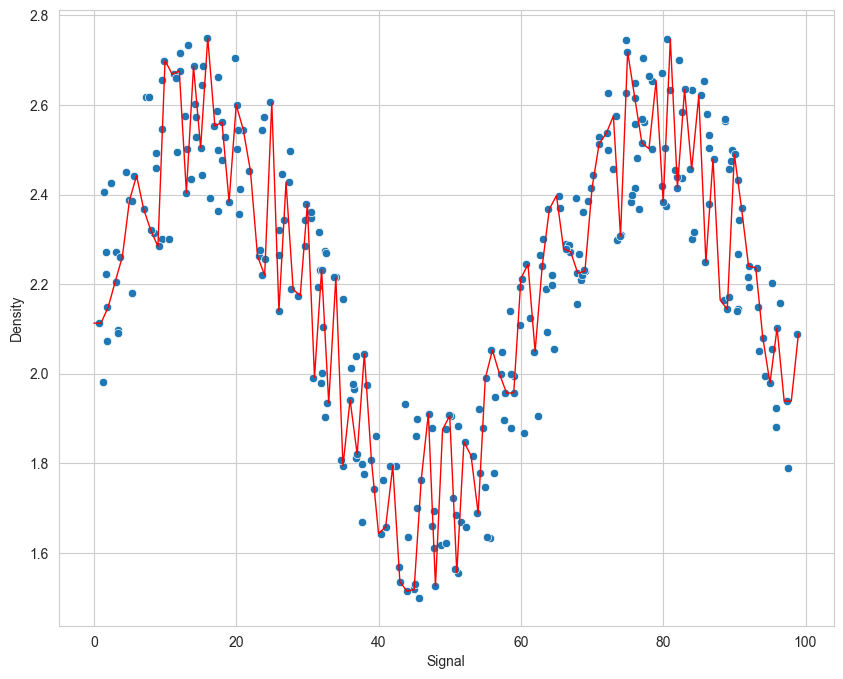

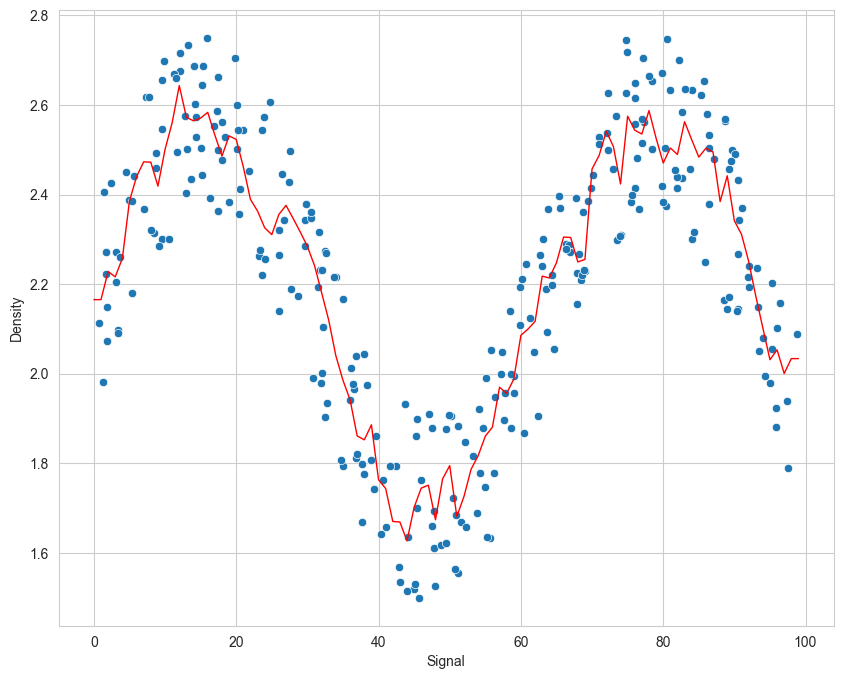

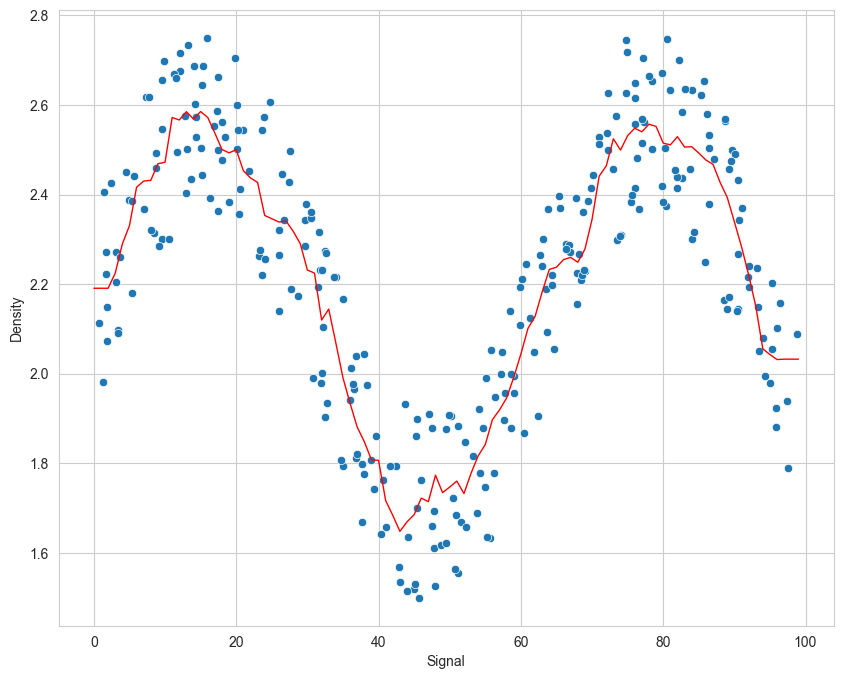

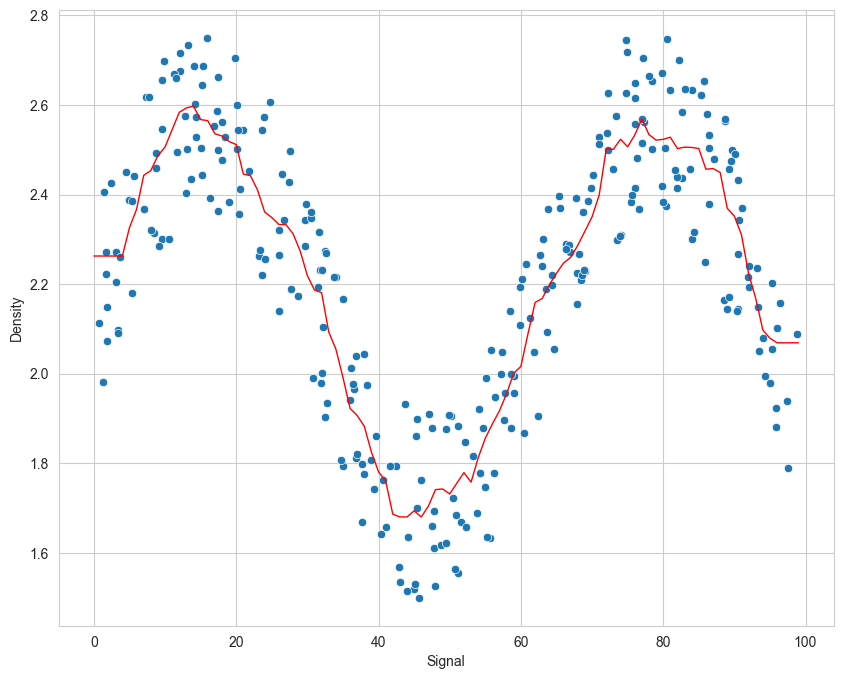

In [12]:
from sklearn.neighbors import KNeighborsRegressor
k_values = [1, 5, 10, 15]

for i in k_values:
    model = KNeighborsRegressor(n_neighbors=i)
    run_model(model, x_train, y_train, x_test, y_test)

**Implementing the Decision Tree with Plotting** 

RMSE - 0.19344403807225877
MAE - 0.16533041633834927


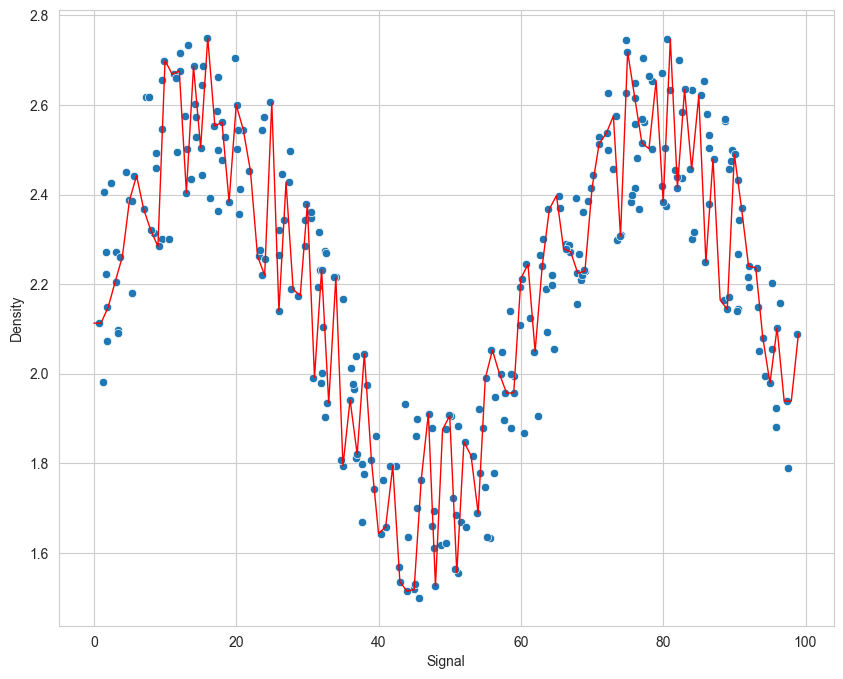

In [13]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
run_model(dt, x_train, y_train, x_test, y_test)

**Implementing the SVM with Plotting**

In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

RMSE - 0.13785789438395146
MAE - 0.11928779725921286


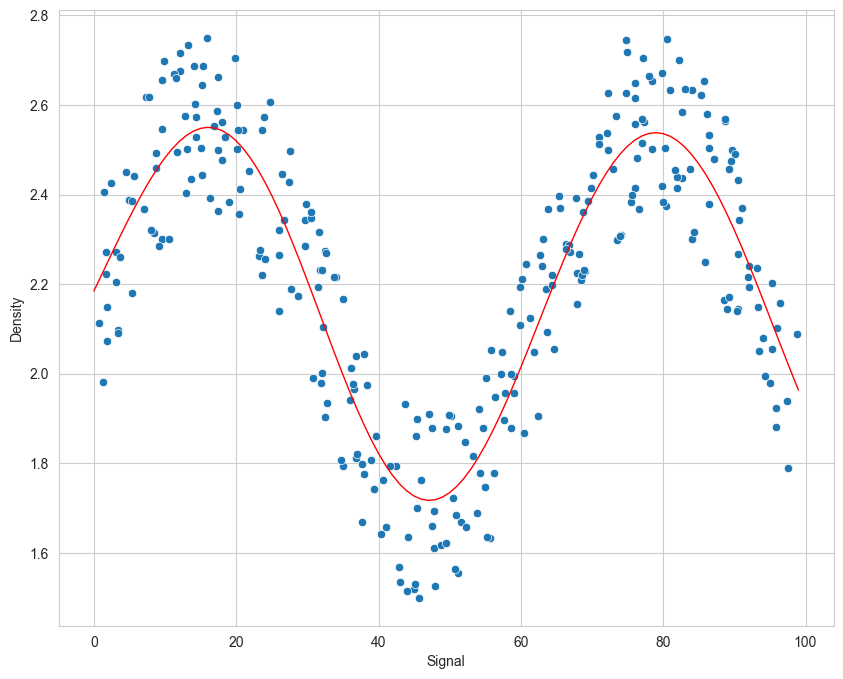

In [15]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], "gamma": ["scale", "auto"]}

grid = GridSearchCV(svr, param_grid)

run_model(grid, x_train, y_train, x_test, y_test)

**Implementing the Random Forest and Plotting it**

RMSE - 0.16624833759059374
MAE - 0.14430219135429564


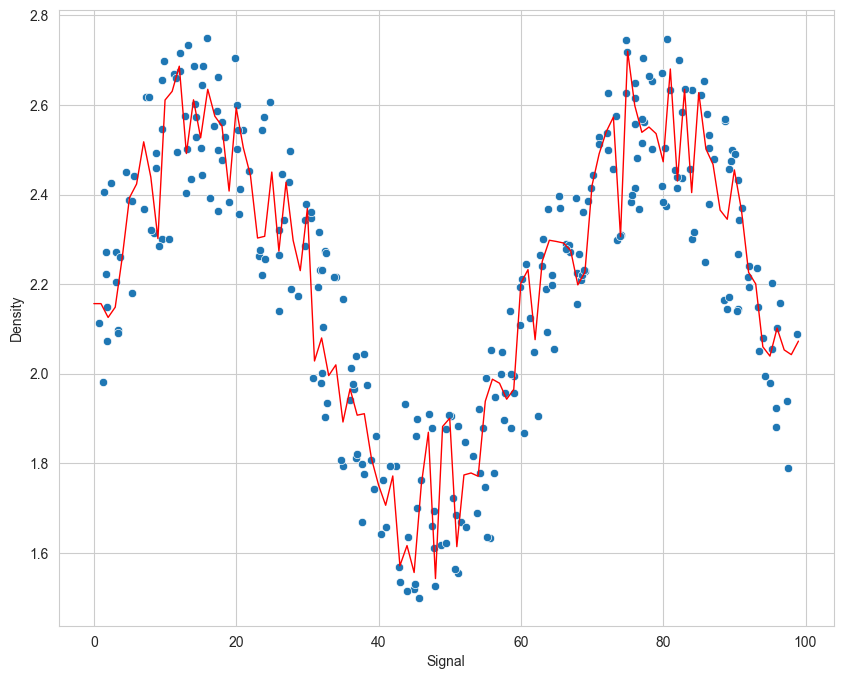

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10)

run_model(rf, x_train, y_train, x_test, y_test)